In [1]:
import pandas as pd
import math
import numpy as np
import os
import matplotlib
# matplotlib.use('GTKAgg')
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

%matplotlib inline

# Get CSV file and treat data


## open file from file list by changing the selected_file variable

In [2]:
folder_path = os.getcwd()
files= ['tabela_final_fdt5','tabela_final_fdt6_cropped.csv', 'tabela_final_fdt8.csv', 'tabela_final_fdt8_p2.csv', 'tabela_final_fdt9.csv']
selected_file = 3
raw_data_path = os.path.join(folder_path, 'files', files[selected_file])
raw_data = pd.read_csv(raw_data_path)

raw_data.head()

,Unnamed: 0,timestamp,ax,ay,az,ball_pos_x,ball_pos_y,ball_pos_z,gx,gy,gz,mx,my,mz,player_pos_x,player_pos_y,player_pos_z,accel_abs,spin_abs
0,6498,18:06:43.025000,0.442017,0.872437,-0.060547,1763.0,330.0,-1809.0,-1.586914,-1.342773,0.122070,-48.095703,17.968750,-42.211914,1832.0,737.0,-1236.0,-0.000107,1.165686
1,6499,18:06:43.067000,0.442017,0.872437,-0.060547,1763.0,330.0,-1809.0,-1.586914,-1.342773,0.122070,-47.387695,18.237305,-42.517090,1832.0,737.0,-1236.0,-0.000107,1.165686
2,6500,18:06:43.068000,0.441284,0.874512,-0.059326,1763.0,330.0,-1809.0,-1.403809,-1.220703,-0.122070,-47.387695,18.237305,-42.517090,1832.0,737.0,-1236.0,0.001337,-1.165686
3,6501,18:06:43.112000,0.440918,0.872681,-0.058960,1763.0,330.0,-1809.0,-1.403809,-1.220703,-0.122070,-48.461914,18.090820,-41.992188,1832.0,737.0,-1236.0,-0.000482,-1.165686
4,6502,18:06:43.113000,0.440918,0.872681,-0.058960,1763.0,330.0,-1809.0,-1.708984,-1.037598,-0.366211,-48.461914,18.090820,-41.992188,1832.0,737.0,-1236.0,-0.000482,-3.497058


In [3]:
raw_data.describe()

,Unnamed: 0,ax,ay,az,ball_pos_x,ball_pos_y,ball_pos_z,gx,gy,gz,mx,my,mz,player_pos_x,player_pos_y,player_pos_z,accel_abs,spin_abs
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7298.000000,0.056716,0.085885,0.091738,3006.086196,1361.982511,-47.030606,-75.011750,-152.825283,-118.740103,-11.039479,29.860503,-1.652166,2393.054341,1305.972517,-263.638351,0.200837,924.703929
std,462.313206,0.866517,0.990952,0.860388,1692.173741,538.362972,1611.391681,301.805183,265.709552,310.027100,23.347673,21.570188,24.143088,1062.453674,506.216051,1077.585229,1.047319,1475.128947
min,6498.000000,-3.999512,-3.999512,-3.999512,785.000000,291.000000,-2011.000000,-1794.738770,-810.668945,-2000.000000,-85.021973,-38.159180,-69.396973,790.000000,-58.000000,-1633.000000,-0.957002,-2132.039758
25%,6898.000000,-0.251099,-0.375122,-0.297607,1762.000000,1010.000000,-1766.000000,-215.087891,-370.788574,-274.658203,-25.061035,17.565918,-16.333008,1663.000000,914.000000,-1297.000000,-0.370820,20.399506
50%,7298.000000,0.067139,0.007812,0.047852,2722.000000,1377.000000,-239.000000,-7.568359,-56.396484,-59.326172,-10.327148,29.724121,1.953125,2226.000000,1286.000000,-631.000000,-0.005093,564.192041
75%,7698.000000,0.478149,0.505371,0.316406,3995.000000,1733.000000,1735.000000,72.082520,11.352539,29.602051,3.662109,44.250488,12.902832,2944.000000,1672.000000,957.000000,0.349335,1599.904083
max,8098.000000,3.999512,3.999512,3.999512,6502.000000,2500.000000,1973.000000,1005.310059,779.907227,1210.266113,60.632324,113.781738,80.444336,5013.000000,2308.000000,1425.000000,5.457566,11557.194196


In [4]:
raw_data.columns

Index(['Unnamed: 0', 'timestamp', 'ax', 'ay', 'az', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'player_pos_x',
       'player_pos_y', 'player_pos_z', 'accel_abs', 'spin_abs'],
      dtype='object')

# Correct timestamps without microseconds

When the row was created in an exact second, the timestamp won't show the microseconds and the conversion will result in error. The next loop checks for 8 legth strings, such as 18:14:10, and adds .000000 to the end. 

In [5]:
for i, text in enumerate(raw_data['timestamp']):
    if len(text) == 8:
        print(f"Index {i} - {raw_data['timestamp'].loc[i]} to {raw_data['timestamp'].loc[i]+ '.000000'} (+ '.000000')")
        raw_data.loc[i, 'timestamp'] = raw_data['timestamp'].loc[i]+'.000000'

# error_list = [4762, 5495, 5783, 7697]
# for error in error_list:
#     print(f"Index {error} - {raw_data['timestamp'].loc[error]}")


In [6]:
raw_data['converted_timestamp'] = pd.to_datetime(raw_data['timestamp'], format="%H:%M:%S.%f")
raw_data.head(5)

,Unnamed: 0,timestamp,ax,ay,az,ball_pos_x,ball_pos_y,ball_pos_z,gx,gy,gz,mx,my,mz,player_pos_x,player_pos_y,player_pos_z,accel_abs,spin_abs,converted_timestamp
0,6498,18:06:43.025000,0.442017,0.872437,-0.060547,1763.0,330.0,-1809.0,-1.586914,-1.342773,0.122070,-48.095703,17.968750,-42.211914,1832.0,737.0,-1236.0,-0.000107,1.165686,1900-01-01 18:06:43.025
1,6499,18:06:43.067000,0.442017,0.872437,-0.060547,1763.0,330.0,-1809.0,-1.586914,-1.342773,0.122070,-47.387695,18.237305,-42.517090,1832.0,737.0,-1236.0,-0.000107,1.165686,1900-01-01 18:06:43.067
2,6500,18:06:43.068000,0.441284,0.874512,-0.059326,1763.0,330.0,-1809.0,-1.403809,-1.220703,-0.122070,-47.387695,18.237305,-42.517090,1832.0,737.0,-1236.0,0.001337,-1.165686,1900-01-01 18:06:43.068
3,6501,18:06:43.112000,0.440918,0.872681,-0.058960,1763.0,330.0,-1809.0,-1.403809,-1.220703,-0.122070,-48.461914,18.090820,-41.992188,1832.0,737.0,-1236.0,-0.000482,-1.165686,1900-01-01 18:06:43.112
4,6502,18:06:43.113000,0.440918,0.872681,-0.058960,1763.0,330.0,-1809.0,-1.708984,-1.037598,-0.366211,-48.461914,18.090820,-41.992188,1832.0,737.0,-1236.0,-0.000482,-3.497058,1900-01-01 18:06:43.113


In [7]:
startTime =  raw_data.converted_timestamp.loc[0]

print(raw_data.timestamp.loc[0])
print(type(raw_data.timestamp.loc[0]))
type(startTime)

18:06:43.025000
<class 'str'>


pandas._libs.tslibs.timestamps.Timestamp

## Add elapsed time column
### convert detatime type to float type


In [8]:
raw_data['elapsed_time'] = raw_data.converted_timestamp - startTime

elapsed_time =  raw_data.loc[:, 'elapsed_time']
elapsed_time = (elapsed_time / np.timedelta64(1,'s')).astype(float)
raw_data['elapsed_time'] = elapsed_time

raw_data[['converted_timestamp', 'elapsed_time']]

,converted_timestamp,elapsed_time
0,1900-01-01 18:06:43.025,0.000
1,1900-01-01 18:06:43.067,0.042
2,1900-01-01 18:06:43.068,0.043
3,1900-01-01 18:06:43.112,0.087
4,1900-01-01 18:06:43.113,0.088
...,...,...
1596,1900-01-01 18:07:15.061,32.036
1597,1900-01-01 18:07:15.062,32.037
1598,1900-01-01 18:07:15.089,32.064
1599,1900-01-01 18:07:15.107,32.082


# Sensor data investigation

## Important to check if sensor data makes sense

change custom_time_range variable from False to True to investigate a specific elapsed time range (in seconds)

In [9]:
# change False to True to investigate a specific elapsed time range (in seconds)
custom_time_range = False

if custom_time_range:
    l_second = 85 # in seconds
    u_second = 150 # in seconds
else:
    l_second = raw_data['elapsed_time'].min() # in seconds
    u_second = raw_data['elapsed_time'].max() # in seconds

l_bound = raw_data.iloc[(raw_data['elapsed_time']-l_second).abs().argsort()[:1]].index.values[0]
u_bound = raw_data.iloc[(raw_data['elapsed_time']-u_second).abs().argsort()[:1]].index.values[0]

print(f'Showing data from item {l_bound} to {u_bound} - [{l_bound}:{u_bound}]')

Showing data from item 0 to 1600 - [0:1600]


recording data from row 0 to row 1600
sample rate accel: 0.999375 Hz


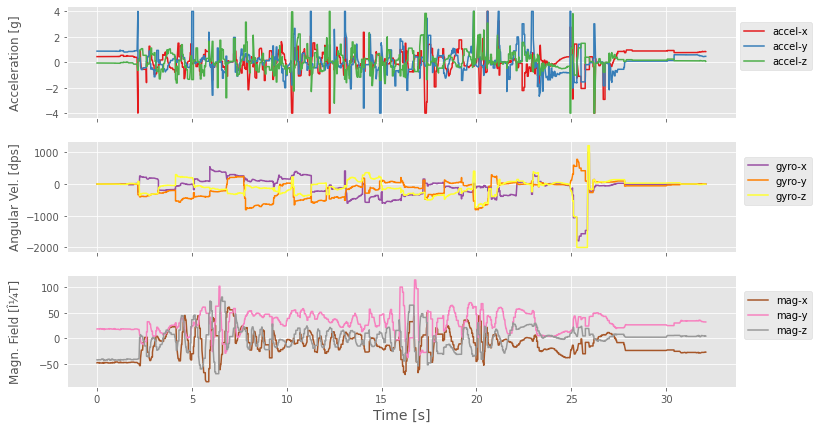

In [37]:
# MPU9250 Simple Visualization Code
# In order for this to run, the mpu9250_i2c file needs to 
# be in the local folder

# from mpu9250_i2c import *
import time,datetime

plt.style.use('ggplot') # matplotlib visual style setting


ii = len(ball_df['elapsed_time']) # number of points
ii = u_bound
t1 = l_bound # for calculating sample rate

# prepping for visualization
mpu6050_str = ['accel-x','accel-y','accel-z','gyro-x','gyro-y','gyro-z']
AK8963_str = ['mag-x','mag-y','mag-z']
mpu6050_vec,AK8963_vec,t_vec = [],[],[]

print(f'recording data from row {l_bound} to row {u_bound}')
for ii in range(l_bound,ii):
    
    try:
        ax,ay,az,wx,wy,wz = raw_data['ax'][ii], raw_data['ay'][ii], raw_data['az'][ii], raw_data['gx'][ii], raw_data['gy'][ii], raw_data['gz'][ii]
        mx,my,mz = raw_data['mx'][ii], raw_data['my'][ii], raw_data['mz'][ii]
    except:
        continue
    t_vec.append(raw_data['elapsed_time'][ii]) # capture timestamp
    AK8963_vec.append([mx,my,mz])
    mpu6050_vec.append([ax,ay,az,wx,wy,wz])
    
print('sample rate accel: {} Hz'.format(ii/((time.time()*0+u_bound)-t1))) # print the sample rate
# t_vec = np.subtract(t_vec,t_vec[0])
# print(f'time {t_vec}')

# plot the resulting data in 3-subplots, with each data axis
fig,axs = plt.subplots(3,1,figsize=(12,7),sharex=True)
cmap = plt.cm.Set1

ax = axs[0] # plot accelerometer data
for zz in range(0,np.shape(mpu6050_vec)[1]-3):
    data_vec = [ii[zz] for ii in mpu6050_vec]
    ax.plot(t_vec,data_vec,label=mpu6050_str[zz],color=cmap(zz))
ax.legend(bbox_to_anchor=(1.12,0.9))
ax.set_ylabel('Acceleration [g]',fontsize=12)

ax2 = axs[1] # plot gyroscope data
for zz in range(3,np.shape(mpu6050_vec)[1]):
    data_vec = [ii[zz] for ii in mpu6050_vec]
    ax2.plot(t_vec,data_vec,label=mpu6050_str[zz],color=cmap(zz))
ax2.legend(bbox_to_anchor=(1.12,0.9))
ax2.set_ylabel('Angular Vel. [dps]',fontsize=12)

ax3 = axs[2] # plot magnetometer data
for zz in range(0,np.shape(AK8963_vec)[1]):
    data_vec = [ii[zz] for ii in AK8963_vec]
    ax3.plot(t_vec,data_vec,label=AK8963_str[zz],color=cmap(zz+6))
ax3.legend(bbox_to_anchor=(1.12,0.9))
ax3.set_ylabel('Magn. Field [Î¼T]',fontsize=12)
ax3.set_xlabel('Time [s]',fontsize=14)

fig.align_ylabels(axs)
plt.show()

# Adjust sensor data

## create ajusted acceleration and adjusted spin

### Acceleration:

reduces the initial absolute acceleration from the accelerometer's previous row's value

In [11]:
rows = len(raw_data['elapsed_time'])
startAccel =  raw_data['accel_abs'].loc[0]
raw_data['adjusted_acceleration'] = raw_data['accel_abs'] - startAccel
raw_data[['accel_abs', 'adjusted_acceleration']]
# raw_data.loc[:, 'adjusted_acceleration']

,accel_abs,adjusted_acceleration
0,-0.000107,0.000000
1,-0.000107,0.000000
2,0.001337,0.001444
3,-0.000482,-0.000374
4,-0.000482,-0.000374
...,...,...
1596,-0.005093,-0.004985
1597,-0.005093,-0.004985
1598,-0.005093,-0.004985
1599,-0.022577,-0.022470



## Spin


calculates max absolute value from the gyro's x, y and z and reduces from the previous row's max value

### Direction change
for now, whenever the adjusted spin changes, we consider the gyro is changing direction

In [12]:
raw_data['adjusted_spin'] = np.zeros(rows).astype(float)
direction_change = np.zeros(rows).astype(int)
last_max = 0
for index, row in raw_data.iterrows():
    this_max = round(max(abs(row['gx']), abs(row['gy']), abs(row['gz'])), 6)
#     print(last_max, this_max)
    delta = float(this_max - last_max)
    if delta > 0:
        raw_data.loc[index, 'adjusted_spin'] = delta
        # print(index, this_max, last_max, raw_data.loc[index, 'adjusted_spin'])
        
        direction_change[index] = 1
#         print(f'Index: {index}: Current spin: {this_max} = Previous spin: {last_max} (+ 1)')
        
        last_max = this_max
    else:
        raw_data.loc[index, 'adjusted_spin'] = raw_data.loc[index -1, 'adjusted_spin']
        direction_change[index] = 0
#         print(f'Index: {index}: Current spin: {this_max} = Previous spin: {last_max} ( = 0 )')
    
raw_data['direction_change'] = direction_change

raw_data[['gx', 'gy', 'gz', 'spin_abs', 'adjusted_spin', 'direction_change']]

,gx,gy,gz,spin_abs,adjusted_spin,direction_change
0,-1.586914,-1.342773,0.122070,1.165686,1.586914,1
1,-1.586914,-1.342773,0.122070,1.165686,1.586914,0
2,-1.403809,-1.220703,-0.122070,-1.165686,1.586914,0
3,-1.403809,-1.220703,-0.122070,-1.165686,1.586914,0
4,-1.708984,-1.037598,-0.366211,-3.497058,0.122070,1
...,...,...,...,...,...,...
1596,1.586914,1.586914,-6.225586,15.153918,935.852051,0
1597,0.427246,3.723145,-4.333496,35.553424,935.852051,0
1598,0.427246,3.723145,-4.333496,35.553424,935.852051,0
1599,0.427246,3.723145,-4.333496,35.553424,935.852051,0


### Signal Direction change

In [13]:
direction_change_signal = np.zeros(rows).astype(int)
gx = raw_data['gx']
gy = raw_data['gy']
gz = raw_data['gz']
counter = 0
for index, row in raw_data.iterrows():
    if index >= 10:
        c_gx, c_gy, c_gz = [(gx[index] >= 0), (gy[index] >= 0), (gz[index] >= 0)]
        p_gx, p_gy, p_gz = [(gx[index-10] >= 0), (gy[index-10] >= 0), (gz[index-10] >= 0)]
        
        if c_gx != p_gx or c_gy != p_gy or c_gz != p_gz:
#             print(f'Index: {index}: Current x, y, z: {c_gx}, {c_gy}, {c_gz} = Previous  x, y, z: {p_gx}, {p_gy}, {p_gz} ( = 1 )')
            direction_change_signal[index] = 1
            counter += 1
        
    else:
#         print(f'Index: {index}: ( = 0 )')
        direction_change_signal[index] = 0
    
direction_change_signal
raw_data['direction_change_signal'] = direction_change_signal
print(f'\n{counter} identified direction changes \n')
raw_data[['gx', 'gy', 'gz', 'direction_change_signal']].head(20)


554 identified direction changes 



,gx,gy,gz,direction_change_signal
0,-1.586914,-1.342773,0.122070,0
1,-1.586914,-1.342773,0.122070,0
2,-1.403809,-1.220703,-0.122070,0
3,-1.403809,-1.220703,-0.122070,0
4,-1.708984,-1.037598,-0.366211,0
5,-1.708984,-1.037598,-0.366211,0
6,-1.708984,-1.037598,-0.366211,0
7,-1.708984,-1.037598,-0.366211,0
8,-1.647949,-0.976562,-0.549316,0
9,-1.647949,-0.976562,-0.549316,0


In [14]:
raw_data.loc[:, ['adjusted_spin', 'direction_change', 'direction_change_signal']].head(30)


,adjusted_spin,direction_change,direction_change_signal
0,1.586914,1,0
1,1.586914,0,0
2,1.586914,0,0
3,1.586914,0,0
4,0.122070,1,0
5,0.122070,0,0
6,0.122070,0,0
7,0.122070,0,0
8,0.122070,0,0
9,0.122070,0,0


# Save individual csv files for ball and player

discard sensor data and use just adjusted columns

In [15]:
ball_df = raw_data[['elapsed_time', 'adjusted_acceleration', 'adjusted_spin', 'direction_change', 'direction_change_signal', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z']]
ball_IMU = raw_data[['elapsed_time', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz']]
player_df = raw_data[['elapsed_time', 'player_pos_x', 'player_pos_y', 'player_pos_z']]
ball_df.columns

Index(['elapsed_time', 'adjusted_acceleration', 'adjusted_spin',
       'direction_change', 'direction_change_signal', 'ball_pos_x',
       'ball_pos_y', 'ball_pos_z'],
      dtype='object')

## correct positioning data

get previous valid data when position is greater then a defined value (50 000)

In [16]:
changes = 0
correction_threshold = 50000
for index, row in ball_df.iterrows():
    if abs(ball_df.loc[index, 'ball_pos_x']) > correction_threshold:
        print(f"Ball index {index}: pos x: {ball_df.loc[index, 'ball_pos_x']} to {ball_df.loc[index -1, 'ball_pos_x']}")
        ball_df.loc[index, 'ball_pos_x'] = ball_df.loc[index - 1, 'ball_pos_x']
        
        changes += 1
    if abs(ball_df.loc[index, 'ball_pos_y']) > correction_threshold:
        print(f"Ball index {index}: pos y: {ball_df.loc[index, 'ball_pos_y']} to {ball_df.loc[index -1, 'ball_pos_y']}")
        ball_df.loc[index, 'ball_pos_y'] = ball_df.loc[index - 1, 'ball_pos_y']
        
        changes += 1
    if abs(ball_df.loc[index, 'ball_pos_z']) > correction_threshold:
        print(f"Ball index {index}: pos z: {ball_df.loc[index, 'ball_pos_z']} to {ball_df.loc[index -1, 'ball_pos_z']}")
        ball_df.loc[index, 'ball_pos_z'] = ball_df.loc[index - 1, 'ball_pos_z']
        
        changes += 1
        
for index, row in player_df.iterrows():        
    if abs(player_df.loc[index, 'player_pos_x']) > correction_threshold:
        print(f"Player index {index}: pos x: {player_df.loc[index, 'player_pos_x']} to {player_df.loc[index -1, 'player_pos_x']}")
        player_df.loc[index, 'player_pos_x'] = player_df.loc[index - 1, 'player_pos_x']
        changes += 1
    if abs(player_df.loc[index, 'player_pos_y']) > correction_threshold:
        print(f"Player index {index}: pos y: {player_df.loc[index, 'player_pos_y']} to {player_df.loc[index -1, 'player_pos_y']}")
        player_df.loc[index, 'player_pos_y'] = player_df.loc[index - 1, 'player_pos_y']
        changes += 1
    
print(f'{changes} changes')

0 changes


## Save checkpoint


In [17]:
files_folder_path_ball = os.path.join(folder_path, 'files', 'ball_data_'+files[selected_file])
files_folder_path_player = os.path.join(folder_path, 'files', 'player_data_'+files[selected_file])
files_folder_path_player = os.path.join(folder_path, 'files', 'ball_IMU_'+files[selected_file])
ball_df.to_csv(files_folder_path_ball, index=False)
player_df.to_csv(files_folder_path_player, index=False)
ball_IMU.to_csv(files_folder_path_player, index=False)

In [18]:
ball_x = ball_df.loc[:, 'ball_pos_x']
ball_y = ball_df.loc[:, 'ball_pos_y']
ball_position = np.array([ball_x, ball_y])
ball_position.shape

player_x = player_df.loc[:, 'player_pos_x']
player_y = player_df.loc[:, 'player_pos_y']
player_position = np.array([ball_x, ball_y])

elapsed_time[5:20]

5     0.116
6     0.120
7     0.131
8     0.132
9     0.176
10    0.177
11    0.189
12    0.222
13    0.229
14    0.266
15    0.267
16    0.270
17    0.311
18    0.312
19    0.336
Name: elapsed_time, dtype: float64

# Ball traveled distance

In [19]:
ball_distance_traveled = []
movement_counter = np.zeros(rows).astype(int)
movement_time=[]
accumulated_elapsed_time = []
stop_watch = 0


for i, x in enumerate(ball_x):
    
    if i == 0: # just to add 0 to the first row
        ball_distance_traveled.append(0)
        movement_counter[i] = 0
        accumulated_elapsed_time.append(0.0)
        movement_time.append(0.0)

    else: 
        
        # calculates the direct distance in meters (data is in mm: distance/1000) from the last to current position
        ball_distance_traveled.append(round(math.hypot(x - ball_x[i - 1], ball_y[i] - ball_y[i - 1])/1000,3))

        
        # if movement is positive, calculate the new position data
        if ball_distance_traveled[i] > 0:
            movement_counter[i] = movement_counter[i-1] + 1 # movement counter increases just when there is a movement. Makes chunks of data  
            accumulated_elapsed_time.append(round(accumulated_elapsed_time[i-1]*0 + elapsed_time[i], 6))
            movement_time.append(round(elapsed_time[i] - stop_watch, 6))
            stop_watch = elapsed_time[i]
            

            
        else:
            movement_counter[i] = movement_counter[i-1]
            movement_time.append(movement_time[i-1])
            accumulated_elapsed_time.append(accumulated_elapsed_time[i-1])
       
        

    
#     print(f'Index: {i}: distance:{player_distance_traveled[i]}, movement counter:{movement_counter[i]}, movement time:{movement_time[i]}, time:{accumulated_elapsed_time[i]}')

column_index = ['ball_distance_traveled', 'movement_counter', 'movement_time']
data = np.array([ball_distance_traveled, movement_counter, movement_time])

for i, col in enumerate(column_index):
    ball_df.loc[:, col] = data[i]


# rows_index = ['Row'+str(i) for i in range(1, len(ball_distance_traveled)+1)]
# column_index = ['ball_distance_traveled', 'movement_counter', 'movement_time']
# data = np.array([ball_distance_traveled, movement_counter, movement_time])
# data = np.transpose(data)
# ball_df = pd.DataFrame(data=data, index=rows_index, columns=column_index)
ball_df.head(20)
ball_df.loc[ball_df['movement_counter']==2]


C:\Users\luizd\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,elapsed_time,adjusted_acceleration,adjusted_spin,direction_change,direction_change_signal,ball_pos_x,ball_pos_y,ball_pos_z,ball_distance_traveled,movement_counter,movement_time
11,0.189,-0.000036,0.244141,0,1,1818.0,354.0,-1745.0,0.03,2.0,0.073
12,0.222,0.000630,0.244141,0,0,1818.0,354.0,-1745.0,0.00,2.0,0.073
13,0.229,0.000630,0.244141,0,0,1818.0,354.0,-1745.0,0.00,2.0,0.073
14,0.266,-0.000490,0.244141,0,0,1818.0,354.0,-1745.0,0.00,2.0,0.073
15,0.267,-0.000490,0.244141,0,0,1818.0,354.0,-1745.0,0.00,2.0,0.073
16,0.270,-0.000490,0.244141,0,0,1818.0,354.0,-1745.0,0.00,2.0,0.073
17,0.311,-0.000067,0.244141,0,0,1818.0,354.0,-1745.0,0.00,2.0,0.073
18,0.312,-0.000067,0.244141,0,0,1818.0,354.0,-1745.0,0.00,2.0,0.073


# Ball speed

In [20]:
accumulated_distance = 0
accumulated_time = 0
ball_speed = np.zeros(rows).astype(float)
new_counter = np.zeros(len(movement_counter)).astype(int)

for i in range(rows):

    # if movement is positive, calculate the the speed from previous position
    if ball_distance_traveled[i] > 0:


        
        
        accumulated_distance += ball_distance_traveled[i]
        accumulated_time += movement_time[i]
        
        if accumulated_time < 0.1:
            #correcting the movement counter

            new_counter[i] = new_counter[i-1]
#             print(f'Index: {i}: Current Counter: {new_counter[i]} = Previous Counter: {movement_counter[i]} (+ 1)')
            
            ball_speed[i] = ball_speed[i-1]
        else:
            #correcting the movement counter
            new_counter[i] = new_counter[i-1] + 1
#             print(f'Index: {i}: Current Counter: {new_counter[i]} = Previous Counter: {movement_counter[i]} ( = )')
            
            
            
            ball_speed[i] = round((accumulated_distance / accumulated_time) * 18 / 5, 4)
#             print(f'speed = {round(accumulated_distance,3)}m / {accumulated_time}s')
            accumulated_distance = 0
            accumulated_time = 0


    else:
        if i > 0: # just to avoid error in the first row
            ball_speed[i] = ball_speed[i-1]
            new_counter[i] = new_counter[i-1]
    #         print(f'Index: {i}: Current Counter: {new_counter[i]} = Previous Counter: {movement_counter[i]} (no dist)')
        
        
#     print(f'Index: {i}: counter:{movement_counter[i]}, dist:{player_distance_traveled[i]},accum dist: {accumulated_distance},  movement time:{movement_time[i]}, accum time: {accumulated_time}, player speed: {player_speed[i]}')

ball_df.loc[:, 'speed']=ball_speed
ball_df.loc[:,'movement_counter']=new_counter
ball_df[:50]
ball_df.loc[ball_df['movement_counter']==2]

C:\Users\luizd\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\luizd\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,elapsed_time,adjusted_acceleration,adjusted_spin,direction_change,direction_change_signal,ball_pos_x,ball_pos_y,ball_pos_z,ball_distance_traveled,movement_counter,movement_time,speed
19,0.336,-0.000067,0.244141,0,0,1840.0,339.0,-1719.0,0.027,2,0.147,0.9327
20,0.356,-0.000249,0.244141,0,0,1840.0,339.0,-1719.0,0.000,2,0.147,0.9327
21,0.357,-0.000249,0.244141,0,0,1840.0,339.0,-1719.0,0.000,2,0.147,0.9327
22,0.376,-0.000249,0.244141,0,0,1840.0,339.0,-1719.0,0.000,2,0.147,0.9327
23,0.401,0.000298,0.244141,0,0,1840.0,339.0,-1719.0,0.000,2,0.147,0.9327
24,0.402,0.000298,0.244141,0,0,1840.0,339.0,-1719.0,0.000,2,0.147,0.9327
25,0.491,0.000081,0.244141,0,0,1840.0,339.0,-1719.0,0.000,2,0.147,0.9327
26,0.492,0.000081,0.244141,0,0,1840.0,339.0,-1719.0,0.000,2,0.147,0.9327
27,0.493,0.000182,0.244141,0,0,1840.0,339.0,-1719.0,0.000,2,0.147,0.9327
28,0.494,0.000182,0.244141,0,0,1840.0,339.0,-1719.0,0.000,2,0.147,0.9327


# Ball max acceleration

identify the max acceleration in one same movement counter

In [21]:
rows_index = ['Row'+str(i) for i in range(1, len(ball_distance_traveled)+1)]
column_index = ['adjusted_acceleration', 'movement_counter']
data = np.array([ball_df['adjusted_acceleration'], ball_df['movement_counter']])
data = np.transpose(data)
show = pd.DataFrame(data=data, index=rows_index, columns=column_index)
show[:50]

,adjusted_acceleration,movement_counter
Row1,0.000000,0.0
Row2,0.000000,0.0
Row3,0.001444,0.0
Row4,-0.000374,0.0
Row5,-0.000374,0.0
Row6,-0.000374,1.0
Row7,-0.000374,1.0
Row8,-0.000374,1.0
Row9,-0.000463,1.0
Row10,-0.000463,1.0


In [22]:
ball_acceleration = ball_df['adjusted_acceleration']
max_counter = int(ball_df['movement_counter'].max())
print(max_counter)
ball_df['max_acceleration'] = np.zeros(rows).astype(float)

for counter in range(max_counter+1):
    max_accel = 0
    mask = (ball_df['movement_counter'] == counter)
    this_sector = ball_df[mask]
    max_accel = 0
    for i, accel in enumerate(this_sector['adjusted_acceleration']):
        if max_accel < accel:
            max_accel = accel

#     print(f'The counter {counter} has the max accel {max_accel}')

    
    ball_df.loc[mask, 'max_acceleration'] = max_accel


211


C:\Users\luizd\AppData\Local\Temp/ipykernel_16956/1149179267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ball_df['max_acceleration'] = np.zeros(rows).astype(float)
C:\Users\luizd\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
ball_df[['max_acceleration', 'movement_counter']][0:50]

,max_acceleration,movement_counter
0,0.001444,0
1,0.001444,0
2,0.001444,0
3,0.001444,0
4,0.001444,0
5,0.000630,1
6,0.000630,1
7,0.000630,1
8,0.000630,1
9,0.000630,1


# Player traveled distance

In [24]:
rows = len(player_x)
player_distance_traveled = []
movement_counter = np.zeros(rows).astype(int)
movement_time=[]
accumulated_elapsed_time = []
stop_watch = 0


for i, x in enumerate(player_x):
    
    if i == 0: # just to add 0 to the first row
        player_distance_traveled.append(0)
        movement_counter[i] = 0
        accumulated_elapsed_time.append(0.0)
        movement_time.append(0.0)

    else: 
        
        # calculates the direct distance in meters (data is in mm: distance/1000) from the last to current position
        player_distance_traveled.append(round(math.hypot(x - player_x[i - 1], player_y[i] - player_y[i - 1])/1000,3))

        
        # if movement is positive, calculate the new position data
        if player_distance_traveled[i] > 0:
            movement_counter[i] = movement_counter[i-1] + 1 # movement counter increases just when there is a movement. Makes chunks of data  
            accumulated_elapsed_time.append(round(accumulated_elapsed_time[i-1]*0 + elapsed_time[i], 6))
            movement_time.append(round(elapsed_time[i] - stop_watch, 6))
            stop_watch = elapsed_time[i]
            

            
        else:
            movement_counter[i] = movement_counter[i-1]
            movement_time.append(movement_time[i-1])
            accumulated_elapsed_time.append(accumulated_elapsed_time[i-1])
       
        

    
#     print(f'Index: {i}: distance:{player_distance_traveled[i]}, movement counter:{movement_counter[i]}, movement time:{movement_time[i]}, time:{accumulated_elapsed_time[i]}')

column_index = ['player_distance_traveled', 'movement_counter', 'movement_time']
data = np.array([player_distance_traveled, movement_counter, movement_time])

for i, col in enumerate(column_index):
    player_df[col] = data[i]

# rows_index = ['Row'+str(i) for i in range(1, len(player_distance_traveled)+1)]
# column_index = ['player_distance_traveled', 'movement_counter', 'movement_time']
# data = np.array([player_distance_traveled, movement_counter, movement_time])
# data = np.transpose(data)
# player_df = pd.DataFrame(data=data, index=rows_index, columns=column_index)
player_df.head(20)

C:\Users\luizd\AppData\Local\Temp/ipykernel_16956/3969239925.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df[col] = data[i]


,elapsed_time,player_pos_x,player_pos_y,player_pos_z,player_distance_traveled,movement_counter,movement_time
0,0.000,1832.0,737.0,-1236.0,0.000,0.0,0.000
1,0.042,1832.0,737.0,-1236.0,0.000,0.0,0.000
2,0.043,1832.0,737.0,-1236.0,0.000,0.0,0.000
3,0.087,1832.0,737.0,-1236.0,0.000,0.0,0.000
4,0.088,1832.0,737.0,-1236.0,0.000,0.0,0.000
5,0.116,1832.0,737.0,-1236.0,0.000,0.0,0.000
6,0.120,1829.0,735.0,-1236.0,0.004,1.0,0.120
7,0.131,1829.0,735.0,-1236.0,0.000,1.0,0.120
8,0.132,1829.0,735.0,-1236.0,0.000,1.0,0.120
9,0.176,1829.0,735.0,-1236.0,0.000,1.0,0.120


# Player speed

In [25]:
accumulated_distance = 0
accumulated_time = 0
player_speed = np.zeros(rows).astype(float)
new_counter = np.zeros(len(movement_counter)).astype(int)
# i=0
for i in range(rows):

    # if movement is positive, calculate the the speed from previous position
    if player_distance_traveled[i] > 0:


        
        
        accumulated_distance += player_distance_traveled[i]
        accumulated_time += movement_time[i]
        
        if accumulated_time < 0.1:
            #correcting the movement counter

            new_counter[i] = new_counter[i-1]
#             print(f'Index: {i}: Current Counter: {new_counter[i]} = Previous Counter: {movement_counter[i]} (+ 1)')
            
            player_speed[i] = player_speed[i-1]
        else:
            #correcting the movement counter
            new_counter[i] = new_counter[i-1] + 1
#             print(f'Index: {i}: Current Counter: {new_counter[i]} = Previous Counter: {movement_counter[i]} ( = )')
            
            
            
            player_speed[i] = round((accumulated_distance / accumulated_time) * 18 / 5, 4)
#             print(f'speed = {round(accumulated_distance,3)}m / {accumulated_time}s')
            accumulated_distance = 0
            accumulated_time = 0


    else:
        if i > 0:
            player_speed[i] = player_speed[i-1]
            new_counter[i] = new_counter[i-1]
    #         print(f'Index: {i}: Current Counter: {new_counter[i]} = Previous Counter: {movement_counter[i]} (no dist)')
        
        
#     print(f'Index: {i}: counter:{movement_counter[i]}, dist:{player_distance_traveled[i]},accum dist: {accumulated_distance},  movement time:{movement_time[i]}, accum time: {accumulated_time}, player speed: {player_speed[i]}')

player_df['speed']=player_speed
player_df['movement_counter']=new_counter
player_df[:50]

C:\Users\luizd\AppData\Local\Temp/ipykernel_16956/4250371767.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['speed']=player_speed
C:\Users\luizd\AppData\Local\Temp/ipykernel_16956/4250371767.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['movement_counter']=new_counter


,elapsed_time,player_pos_x,player_pos_y,player_pos_z,player_distance_traveled,movement_counter,movement_time,speed
0,0.000,1832.0,737.0,-1236.0,0.000,0,0.000,0.0000
1,0.042,1832.0,737.0,-1236.0,0.000,0,0.000,0.0000
2,0.043,1832.0,737.0,-1236.0,0.000,0,0.000,0.0000
3,0.087,1832.0,737.0,-1236.0,0.000,0,0.000,0.0000
4,0.088,1832.0,737.0,-1236.0,0.000,0,0.000,0.0000
5,0.116,1832.0,737.0,-1236.0,0.000,0,0.000,0.0000
6,0.120,1829.0,735.0,-1236.0,0.004,1,0.120,0.1200
7,0.131,1829.0,735.0,-1236.0,0.000,1,0.120,0.1200
8,0.132,1829.0,735.0,-1236.0,0.000,1,0.120,0.1200
9,0.176,1829.0,735.0,-1236.0,0.000,1,0.120,0.1200


## Save checkpoint

In [26]:
files_folder_path_ball = os.path.join(folder_path, 'files', 'ball_calculated_data_'+files[selected_file])
files_folder_path_player = os.path.join(folder_path, 'files', 'player_calculated_data_'+files[selected_file])

ball_df.to_csv(files_folder_path_ball, index=False)
player_df.to_csv(files_folder_path_player, index=False)

# Organizing Dataframes

In [27]:
# for col in ball_data.columns:
#     print(col)
# #     print(ball_data[col])
#     ball_df[col] = ball_data[col].values


# ball_df.columns

#reordering columns
ball_df = ball_df[['elapsed_time', 'movement_counter', 'adjusted_acceleration', 'max_acceleration', 'adjusted_spin', 'direction_change', 'direction_change_signal', 'ball_pos_x',
       'ball_pos_y', 'ball_pos_z', 'ball_distance_traveled', 'movement_time', 'speed']]

ball_df[10:30]

,elapsed_time,movement_counter,adjusted_acceleration,max_acceleration,adjusted_spin,direction_change,direction_change_signal,ball_pos_x,ball_pos_y,ball_pos_z,ball_distance_traveled,movement_time,speed
10,0.177,1,-0.000036,0.000630,0.244141,1,1,1791.0,340.0,-1779.0,0.000,0.116,0.9310
11,0.189,1,-0.000036,0.000630,0.244141,0,1,1818.0,354.0,-1745.0,0.030,0.073,0.9310
12,0.222,1,0.000630,0.000630,0.244141,0,0,1818.0,354.0,-1745.0,0.000,0.073,0.9310
13,0.229,1,0.000630,0.000630,0.244141,0,0,1818.0,354.0,-1745.0,0.000,0.073,0.9310
14,0.266,1,-0.000490,0.000630,0.244141,0,0,1818.0,354.0,-1745.0,0.000,0.073,0.9310
15,0.267,1,-0.000490,0.000630,0.244141,0,0,1818.0,354.0,-1745.0,0.000,0.073,0.9310
16,0.270,1,-0.000490,0.000630,0.244141,0,0,1818.0,354.0,-1745.0,0.000,0.073,0.9310
17,0.311,1,-0.000067,0.000630,0.244141,0,0,1818.0,354.0,-1745.0,0.000,0.073,0.9310
18,0.312,1,-0.000067,0.000630,0.244141,0,0,1818.0,354.0,-1745.0,0.000,0.073,0.9310
19,0.336,2,-0.000067,0.000298,0.244141,0,0,1840.0,339.0,-1719.0,0.027,0.147,0.9327


In [28]:
# for col in player_data.columns:
#     print(col)
# #     print(ball_data[col])
#     player_df[col] = player_data[col].values

#reordering columns
player_df = player_df[['elapsed_time', 'movement_counter', 'player_pos_x', 'player_pos_y', 'player_pos_z', 'player_distance_traveled', 'movement_time', 'speed']]
print(player_df.columns)
player_df[10:30]

Index(['elapsed_time', 'movement_counter', 'player_pos_x', 'player_pos_y',
       'player_pos_z', 'player_distance_traveled', 'movement_time', 'speed'],
      dtype='object')


,elapsed_time,movement_counter,player_pos_x,player_pos_y,player_pos_z,player_distance_traveled,movement_time,speed
10,0.177,1,1829.0,735.0,-1236.0,0.000,0.120,0.1200
11,0.189,1,1829.0,735.0,-1236.0,0.000,0.120,0.1200
12,0.222,1,1829.0,735.0,-1236.0,0.000,0.120,0.1200
13,0.229,2,1831.0,758.0,-1232.0,0.023,0.109,0.7596
14,0.266,2,1831.0,758.0,-1232.0,0.000,0.109,0.7596
15,0.267,2,1831.0,758.0,-1232.0,0.000,0.109,0.7596
16,0.270,2,1829.0,769.0,-1216.0,0.011,0.041,0.7596
17,0.311,2,1829.0,769.0,-1216.0,0.000,0.041,0.7596
18,0.312,2,1829.0,769.0,-1216.0,0.000,0.041,0.7596
19,0.336,2,1829.0,769.0,-1216.0,0.000,0.041,0.7596


In [29]:
ball_df.to_csv(files_folder_path_ball, index=False)
player_df.to_csv(files_folder_path_player, index=False)

# Calculate distances
## Goal
If ball's x is greater than the goal line in the x axis (6389) and if the ball is inbetween the goal posts' y (1060 / 1660)

In [30]:
goal_p1_xy = (6389, 1060)
goal_p2_xy = (6389, 1660)



In [31]:
ball_x = ball_df['ball_pos_x']
ball_y = ball_df['ball_pos_y']

is_goal = np.zeros(rows).astype(int)
goal_counter = False


for i in range(rows):
    if ball_x[i] >= goal_p1_xy[0] and ball_y[i] >= goal_p1_xy[1] and ball_y[i] <= goal_p2_xy[1]:
        if is_goal[i -1] != 1 and goal_counter == False:
            is_goal[i] += 1
            print(f"Is goal on row: {i} move: {ball_df['movement_counter'][i]}: Is goal: {is_goal[i]}")
            goal_counter = True
    else:
        goal_counter = False


Is goal on row: 1419 move: 176: Is goal: 1
Is goal on row: 1527 move: 199: Is goal: 1


## Possession
If ball is in a 50cm radius from the player (dynamic) and ball perceives an aceleration

In [32]:
player_x = player_df['player_pos_x']
player_y = player_df['player_pos_y']
ball_accel = ball_df['max_acceleration']
ball_direction = ball_df['direction_change']
ball_direction_signal = ball_df['direction_change_signal']

ball_player_dist = np.zeros(rows).astype(float)
is_possession = np.zeros(rows).astype(int)
is_touch = np.zeros(rows).astype(int)
possession_radius = 50 # in cm
touch_accel = 0.5 # change to make sensible to acceleration
direction_signal = 0 # change to 1 make sensible to gyro

touch_counter = False

for i in range(rows):
    ball_player_dist[i] = round(math.hypot((player_x[i] - ball_x[i]), (player_y[i] - ball_y[i]))/10,6)
    if ball_player_dist[i] <= possession_radius:
        is_possession[i] = 1
    # include acceleration
        if touch_counter == False and (ball_accel[i] > touch_accel or ball_direction_signal[i] >= direction_signal) :
            is_touch[i] = 1
            touch_counter = True
            print(f"Is touch on row: {i} move: {player_df['movement_counter'][i]}: Has possession: {is_possession[i]} at {round(ball_player_dist[i],2)}cm with {round(ball_accel[i], 4)}g speed and {ball_direction[i]}/{ball_direction_signal[i]} direction")
    elif ball_player_dist[i] > 50:
        touch_counter = False
    
        
ball_player_dist

Is touch on row: 0 move: 0: Has possession: 1 at 41.28cm with 0.0014g speed and 1/0 direction
Is touch on row: 293 move: 37: Has possession: 1 at 41.84cm with 0.3594g speed and 0/0 direction
Is touch on row: 470 move: 59: Has possession: 1 at 41.81cm with 0.5683g speed and 0/0 direction
Is touch on row: 472 move: 60: Has possession: 1 at 36.44cm with 0.1501g speed and 0/0 direction
Is touch on row: 477 move: 61: Has possession: 1 at 49.55cm with 1.0095g speed and 0/0 direction
Is touch on row: 499 move: 63: Has possession: 1 at 44.49cm with 0.9879g speed and 0/0 direction
Is touch on row: 506 move: 64: Has possession: 1 at 33.97cm with 0.3357g speed and 0/0 direction
Is touch on row: 511 move: 65: Has possession: 1 at 36.28cm with 1.1051g speed and 0/0 direction
Is touch on row: 1123 move: 139: Has possession: 1 at 44.8cm with 4.1814g speed and 0/1 direction
Is touch on row: 1127 move: 139: Has possession: 1 at 48.38cm with 4.1814g speed and 0/1 direction
Is touch on row: 1137 move: 14

array([ 41.280746,  41.280746,  41.280746, ..., 392.053058, 392.053058,
       392.053058])

In [33]:
player_df['distance_to_ball'] = ball_player_dist
player_df['has_posession'] = is_possession
player_df['is_touch'] = is_touch

ball_df['is_goal'] = is_goal

In [38]:
ball_df[5460:5480]

,elapsed_time,movement_counter,adjusted_acceleration,max_acceleration,adjusted_spin,direction_change,direction_change_signal,ball_pos_x,ball_pos_y,ball_pos_z,ball_distance_traveled,movement_time,speed,is_goal


In [35]:
player_df[1:50]

,elapsed_time,movement_counter,player_pos_x,player_pos_y,player_pos_z,player_distance_traveled,movement_time,speed,distance_to_ball,has_posession,is_touch
1,0.042,0,1832.0,737.0,-1236.0,0.000,0.000,0.0000,41.280746,1,0
2,0.043,0,1832.0,737.0,-1236.0,0.000,0.000,0.0000,41.280746,1,0
3,0.087,0,1832.0,737.0,-1236.0,0.000,0.000,0.0000,41.280746,1,0
4,0.088,0,1832.0,737.0,-1236.0,0.000,0.000,0.0000,41.280746,1,0
5,0.116,0,1832.0,737.0,-1236.0,0.000,0.000,0.0000,39.911151,1,0
6,0.120,1,1829.0,735.0,-1236.0,0.004,0.120,0.1200,39.682364,1,0
7,0.131,1,1829.0,735.0,-1236.0,0.000,0.120,0.1200,39.682364,1,0
8,0.132,1,1829.0,735.0,-1236.0,0.000,0.120,0.1200,39.682364,1,0
9,0.176,1,1829.0,735.0,-1236.0,0.000,0.120,0.1200,39.682364,1,0
10,0.177,1,1829.0,735.0,-1236.0,0.000,0.120,0.1200,39.682364,1,0


## Save checkpoint

In [36]:
ball_df.to_csv(files_folder_path_ball, index=False)
player_df.to_csv(files_folder_path_player, index=False)

# To Do

- [x] Optimize max acceleration per movement
- [x] test different data
- crop active game
- make other points for distance calculation
- Optimize sensor adjustments
- calculate real acceleration

